# Project Title: Bank Marketing

#### Abstract

This data is related to direct marketing campaign of Portuguese banking institute. The input variables include the client's personal data in bank, the data related to number of times and duration of calls made to client and other attributes regarding social and economical values of client. Some of these input variables are categorical while rest are numeric. The output variable denotes whether client subscribes to term deposit or not.

In this case, any randomly selected sample belongs to either of two classes - 'yes' or 'no'. Hence, it is classification problem. The step by step approach is explained as follows.

The classification goal is to predict whether client will subscribe to term deposit or not

#### Potential applications of this project

1. In today's telemarketing era, such data can be generated for different campaigns. Not limiting the classification problem to only binary classification, such type of analysis can be used for Multiclass classification. For example, credit card companies contact customers to make them buy different types of credit cards, such companies can generate a huge data regarding customer's personal, professional details, contacting details. Using these ML algorithms, they can predict which customers will choose which type of credit card and they can only contact to desired customers. This will save the company's time as well as other resources.


2. This type of analysis can be used in mass production industry for machine components for maintaining quality of the output product. The data can be available or can be collected for all the manufactured components and their accepted quality. From such data, the factors which affect the output quality can be analysed. The machine learning algorithms, in this case can be used to predict the quality of the product even before it is manufactured.

#### Step-by-Step approach

From the initial insights, I found that, there are four data sets in this project which include the details of marketing campaign ordered by date. The first two data sets bank-additional-full.csv and bank-additional.csv contain 20 input variables and 1 output variable, from which 10 input variables are of categorical type and rest are numeric type.

The next two data sets bank-full.csv and bank.csv contain 17 input variables and 1 output variable, from which 10 input variables are of categorical type.

The initial counting of subscriptions and no subscriptions, shows that the maximum number of clients are not subscribed for the term deposit. In order to fit the ML model and achieve the goal, we need to check which variables can affect the output 'y'. In order to proceed with training the model and predicting the output, all the categorical variables were encoded with numerical values.

In this project, I tried different data exloration methods to analyse the effect of input variables on desired output. Following steps were followed in this project.

1. Initially all commonly required packages will be imported
2. Each data set is read and stored in a separate data frame
3. Each data set is analysed separately using different exploration methods and different classification algorithms are used for training the model and making predictions.
4. Each algorithm is evaluated using classification report and confusion matrix
5. At the end of the project, the Accuracy of all the algorithms is summarised

#### Algorithms used

Different classification algorithm is used for each data set.

1. bank-additional-full.csv data set --> Logistic Regression Classifier
2. bank-additional.csv data set      --> Random Forest Classifier
3. bank-full.csv data set            --> Decision Tree Classifier
4. bank.csv data set                 --> K-Nearest Neighbors Classifier

#### Modules/Packages used

1. numpy
2. pandas
3. matplotlib
4. seaborn
5. scikit-learn

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df_bank_additional_full=pd.read_csv('bank-additional-full.csv')
df_bank_additional=pd.read_csv('bank-additional.csv')
df_bank_full=pd.read_csv('bank-full.csv')
df_bank=pd.read_csv('bank.csv')

### ----------------------------------------------------------------------
## Analysis of bank-additional-full.csv file
### ----------------------------------------------------------------------

In [3]:
df_bank_additional_full.shape # Checking Size

(41188, 21)

In [4]:
df_bank_additional_full['y'].value_counts() # Counting the subscription and no subscriptions

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df_bank_additional_full.columns # Checking names of columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df_bank_additional_full.info() # Checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df_bank_additional_full.head() # Checking 1st five rows of the data set

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df_bank_additional_full.describe() # Checking statistical details

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df_bank_additional_full.isnull().sum() # Checking  whether null is present in any column

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df_bank_additional_full.isna().sum() # checking for NaN

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

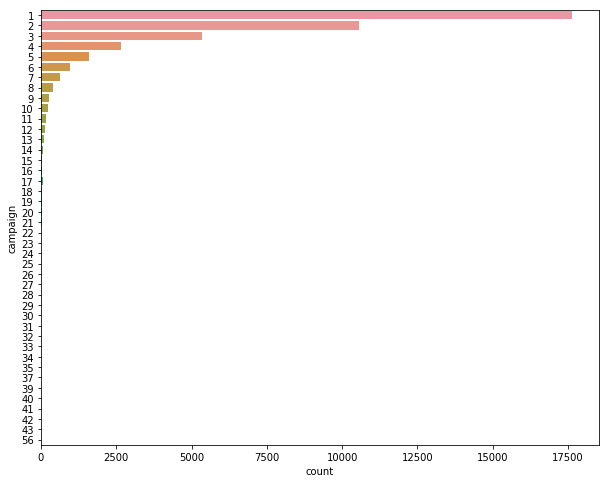

In [11]:
# To analyse how many calls are made within this campaign
plt.figure(figsize=(10,8))
g=sns.countplot(y='campaign', data=df_bank_additional_full)

In [12]:
# Analysis of client details for successfull deposit subscription
yes_yid=df_bank_additional_full.index[df_bank_additional_full['y'] == 'yes'].tolist() # index of rows where client has subscribed for term deposit
print(yes_yid)

[75, 83, 88, 129, 139, 182, 286, 388, 389, 446, 469, 504, 556, 681, 820, 832, 856, 870, 876, 1078, 1114, 1166, 1189, 1233, 1256, 1319, 1348, 1396, 1442, 1444, 1501, 1608, 1613, 1632, 1636, 1655, 1691, 1725, 1763, 1791, 1809, 1819, 2002, 2039, 2064, 2104, 2257, 2275, 2305, 2315, 2316, 2330, 2406, 2417, 2421, 2424, 2444, 2449, 2473, 2635, 2645, 2684, 2697, 2713, 2744, 2755, 2763, 2775, 2779, 2853, 2905, 3047, 3090, 3113, 3174, 3183, 3203, 3219, 3223, 3259, 3264, 3338, 3381, 3384, 3395, 3427, 3436, 3453, 3506, 3541, 3545, 3564, 3566, 3570, 3574, 3576, 3608, 3628, 3661, 3677, 3685, 3693, 3697, 3734, 3740, 3774, 3854, 3887, 3939, 3979, 3988, 4034, 4050, 4110, 4152, 4164, 4167, 4209, 4252, 4264, 4268, 4294, 4353, 4479, 4485, 4522, 4609, 4623, 4635, 4652, 4672, 4677, 4694, 4720, 4737, 4752, 4769, 4793, 4851, 4872, 4880, 4899, 4902, 4904, 4982, 5007, 5027, 5056, 5073, 5084, 5107, 5112, 5162, 5174, 5329, 5347, 5363, 5384, 5415, 5435, 5442, 5550, 5613, 5619, 5636, 5638, 5652, 5699, 5707, 5731, 5

In [13]:
subdf_bank_additional_full = df_bank_additional_full.loc[ yes_yid , : ]

In [14]:
subdf_bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


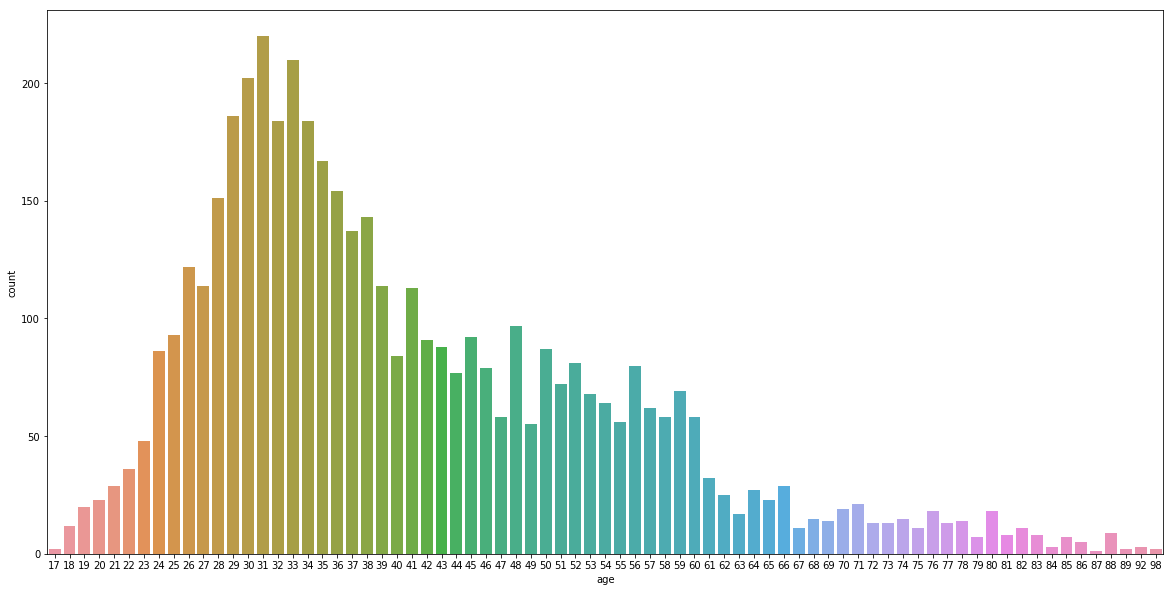

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', data=subdf_bank_additional_full) # Distribution of client age who already subscribed for term deposit

From above graph, it is clear that the people who subscribed for the deposit are mostly from the age group 24 to 41

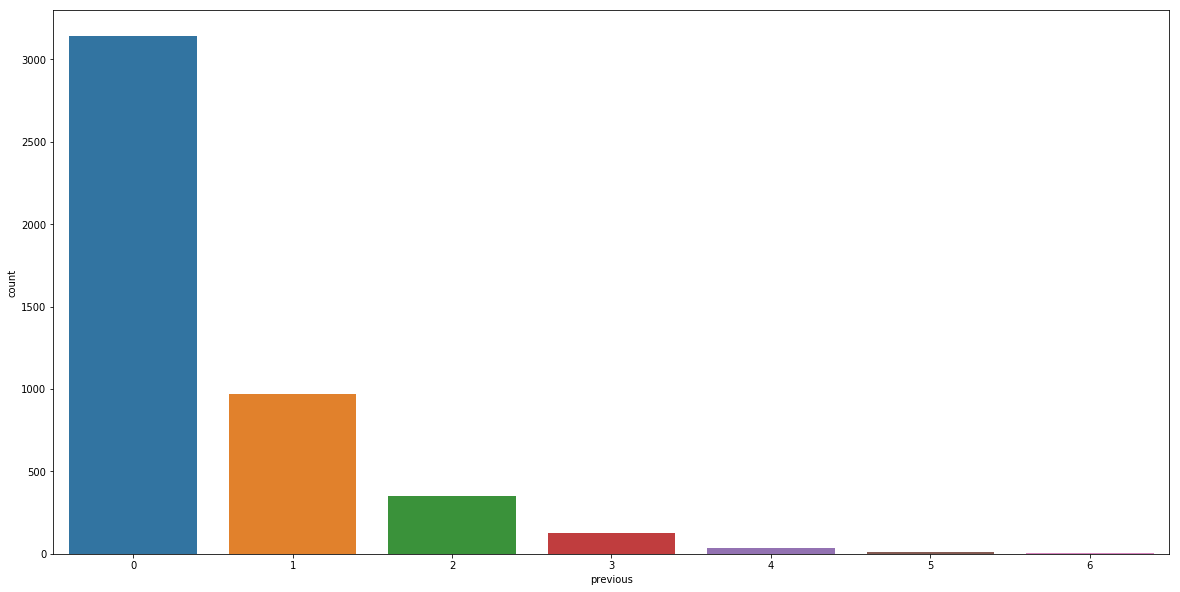

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='previous', data=subdf_bank_additional_full) # Number of clients who were contacted before this campaign

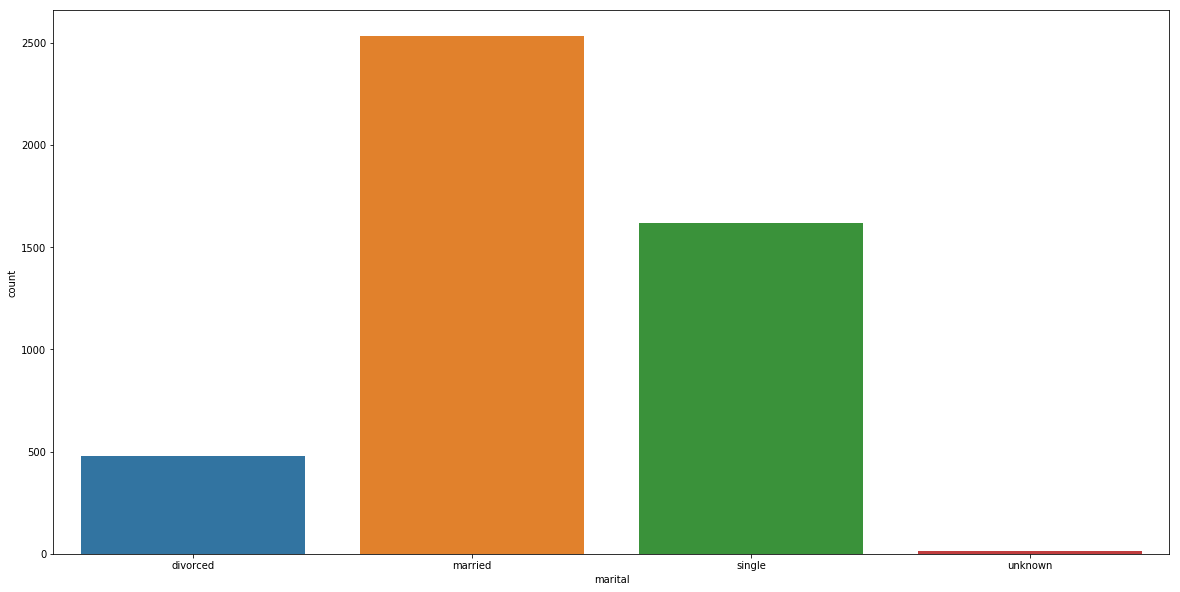

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='marital', data=subdf_bank_additional_full) # Marital status of clients who already subscribed for term deposit

Maximum clients who subscribed for loan are Married

In [18]:
# Correlation Matrix
data_for_correlation = df_bank_additional_full[['age','duration','campaign','previous']]
df_corr = data_for_correlation.corr()
df_corr

,age,duration,campaign,previous
age,1.000000,-0.000866,0.004594,0.024365
duration,-0.000866,1.000000,-0.071699,0.020640
campaign,0.004594,-0.071699,1.000000,-0.079141
previous,0.024365,0.020640,-0.079141,1.000000


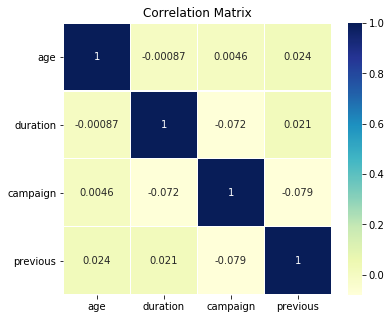

In [19]:
correlation_heatmap = sns.heatmap(df_corr,annot=True,cmap='YlGnBu',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10,rotation=360)
plt.title('Correlation Matrix')
plt.show()

### Prediction for bank-additional-full.csv data set

In [20]:
# These columns can affect the output
affecting_var=['age','job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y']

In [21]:
# Coverting Categorical data into numeric codes --> Encoding the categorical data
for col in df_bank_additional_full.columns:
    if df_bank_additional_full[col].dtype==object:
           df_bank_additional_full[col]=df_bank_additional_full[col].astype('category')
           df_bank_additional_full[col]=df_bank_additional_full[col].cat.codes

In [22]:
df_bank_additional_full[affecting_var].head()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,0,0,0,0,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,0
1,57,7,3,1,0,0,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,0
2,37,7,3,0,2,0,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,0
3,40,0,1,0,0,0,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,0
4,56,7,3,0,0,2,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,0


In [23]:
df_bank_additional_full[affecting_var].tail()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
41183,73,5,5,0,2,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,1
41184,46,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,0
41185,56,5,6,0,2,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,0
41186,44,9,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,1
41187,74,5,5,0,2,0,7,0,239,3,999,1,0,-1.1,94.767,-50.8,1.028,0


### *Using Logistic Regression Classifier*

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df_bank_additional_full.drop('y',axis=1)
Y=df_bank_additional_full['y']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
# Training
logmodel=LogisticRegression(solver='lbfgs',max_iter=500)
lm=logmodel.fit(X_train,y_train)

In [25]:
predictions=logmodel.predict(X_test)

### *Classification Report*

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10978
           1       0.65      0.38      0.48      1379

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.79      0.68      0.71     12357
weighted avg       0.90      0.91      0.90     12357



In [27]:
logmodelscore=logmodel.score(X_test,y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


This gives percentage of correctly identified points

### *Confusion Matrix*

calculating confusion matrix to evaluate the accuracy of classification model

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[10702   276]
 [  857   522]]


This means we get 11224 (10702+522) correct predictions and 1133 (276+857) incorrect predictions

### --------------------------------------------------------------
## Analysis of bank-additional.csv file
### --------------------------------------------------------------

This data set is collection of 10% randomly selected data points from the previous data set bank-additional-full.csv file

In [29]:
df_bank_additional.shape

(4119, 21)

In [30]:
df_bank_additional['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [31]:
df_bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [32]:
df_bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [33]:
df_bank_additional.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [34]:
df_bank_additional.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


Above result shows that the average age of clients who subscribed for term deposit is more than the clients who did not subscribe

In [35]:
# Correlation Matrix
data_for_correlation_1 = df_bank_additional[['age','duration','campaign','previous']]
df_corr_1 = data_for_correlation_1.corr()
df_corr_1

,age,duration,campaign,previous
age,1.000000,0.041299,-0.014169,0.050931
duration,0.041299,1.000000,-0.085348,0.025724
campaign,-0.014169,-0.085348,1.000000,-0.091490
previous,0.050931,0.025724,-0.091490,1.000000


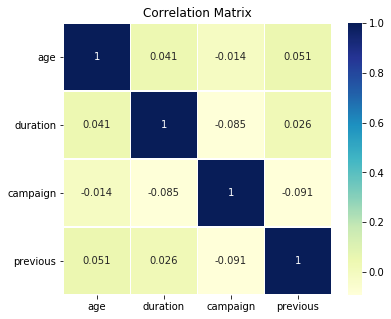

In [36]:
correlation_heatmap = sns.heatmap(df_corr_1,annot=True,cmap='YlGnBu',linewidths=0.4,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10,rotation=360)
plt.title('Correlation Matrix')
plt.show()

### Prediction for bank-additional.csv data set

In [37]:
# Encoding the categorical data
for col in df_bank_additional.columns:
    if df_bank_additional[col].dtype==object:
           df_bank_additional[col]=df_bank_additional[col].astype('category')
           df_bank_additional[col]=df_bank_additional[col].cat.codes

In [38]:
df_bank_additional[affecting_var].head()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,30,1,2,0,2,0,6,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,0
1,39,7,3,0,0,0,6,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,0
2,25,7,3,0,2,0,4,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,0
3,38,7,2,0,1,1,4,0,17,3,999,0,1,1.4,94.465,-41.8,4.959,0
4,47,0,6,0,2,0,7,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,0


In [39]:
df_bank_additional[affecting_var].tail()

,age,job,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
4114,30,0,1,0,2,2,3,2,53,1,999,0,1,1.4,93.918,-42.7,4.958,0
4115,39,0,3,0,2,0,3,0,219,1,999,0,1,1.4,93.918,-42.7,4.959,0
4116,27,8,3,0,0,0,6,1,64,2,999,1,0,-1.8,92.893,-46.2,1.354,0
4117,58,0,3,0,0,0,1,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,0
4118,34,4,3,0,2,0,7,4,175,1,999,0,1,-0.1,93.200,-42.0,4.120,0


### *Using Random Forest Classifier*

In [40]:
from sklearn.model_selection import train_test_split
X=df_bank_additional.drop('y',axis=1)
Y=df_bank_additional['y']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
rfpredictions=RF.predict(X_test)

### *Classification Report and Confusion Matrix*

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1102
           1       0.71      0.15      0.25       134

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.81      0.57      0.60      1236
weighted avg       0.88      0.90      0.87      1236



In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rfpredictions)
print(confusion_matrix)

[[1094    8]
 [ 114   20]]


In [44]:
RFscore=RF.score(X_test,y_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.90


### ------------------------------------------------
## Analysis of bank-full.csv file
### ------------------------------------------------

In [45]:
df_bank_full.shape

(45211, 17)

In [46]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
df_bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [48]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [49]:
df_bank_full.isna().sum() # Checking for NaN

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [50]:
df_bank_full.describe() # Statistical Information

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [51]:
df_bank_full.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [52]:
# Encoding the categorical data
for col in df_bank_full.columns:
    if df_bank_full[col].dtype==object:
           df_bank_full[col]=df_bank_full[col].astype('category')
           df_bank_full[col]=df_bank_full[col].cat.codes

In [53]:
df_bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [54]:
df_bank_full.groupby('marital').mean()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
0,45.782984,4.452084,1.202996,0.024582,1178.872287,0.558287,0.176877,0.670444,15.796428,5.744191,262.517188,2.630882,41.001728,0.551373,2.564817,0.119455
1,43.408099,4.091607,1.151099,0.016462,1425.925590,0.562982,0.171235,0.664254,15.854487,5.459616,253.412765,2.842875,37.950467,0.556552,2.574961,0.101235
2,33.703440,4.822048,1.390539,0.018686,1301.497654,0.539640,0.130023,0.576857,15.708210,5.567866,266.497967,2.649805,44.652385,0.642690,2.526114,0.149492


For all the marital status, the average value of subscriptions varies  only by small difference. So not considering the column 'marital' while making predictions. 

In [55]:
# Correlation Matrix
data_for_correlation_2 = df_bank_full[['age','duration','campaign','previous']]
df_corr_2 = data_for_correlation_2.corr()
df_corr_2

,age,duration,campaign,previous
age,1.000000,-0.004648,0.004760,0.001288
duration,-0.004648,1.000000,-0.084570,0.001203
campaign,0.004760,-0.084570,1.000000,-0.032855
previous,0.001288,0.001203,-0.032855,1.000000


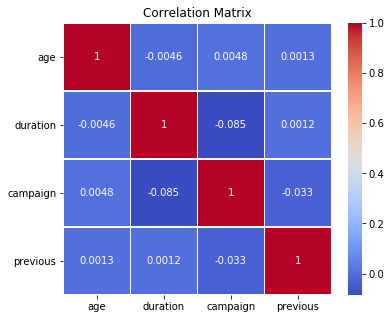

In [56]:
correlation_heatmap = sns.heatmap(df_corr_2,annot=True,cmap='coolwarm',linewidths=0.4,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10,rotation=360)
plt.title('Correlation Matrix')
plt.show()

In [57]:
df_bank_full_final=df_bank_full # Making copy of original data set

In [58]:
df_bank_full_final.drop('marital',axis=1)

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [59]:
df_bank_full_final.shape

(45211, 17)

### *Using Decision Tree Classifier and Prediction for bank-full.csv data set*

In [60]:
from sklearn.model_selection import train_test_split
X=df_bank_full_final.drop('y',axis=1)
Y=df_bank_full_final['y']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [61]:
# Training
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [62]:
trpredictions=dtmodel.predict(X_test)

### *Classification Report and Confusion Matrix*

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,trpredictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11967
           1       0.53      0.33      0.40      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.72      0.64      0.67     13564
weighted avg       0.87      0.89      0.87     13564



In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, trpredictions)
print(confusion_matrix)

[[11512   455]
 [ 1077   520]]


In [65]:
dtscore=dtmodel.score(X_test,y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtmodel.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.89


### ------------------------------------------
## Analysis of bank.csv file
### ------------------------------------------

This data set contains 10% randomly selected data points from the earlier data set

In [66]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [67]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [68]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [69]:
df_bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [70]:
# Encoding the categorical data
for col in df_bank.columns:
    if df_bank[col].dtype==object:
           df_bank[col]=df_bank[col].astype('category')
           df_bank[col]=df_bank[col].cat.codes

In [71]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [72]:
# Correlation Matrix of all the variables in data set
data_for_correlation_3 = df_bank
df_corr_3 = data_for_correlation_3.corr()
df_corr_3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


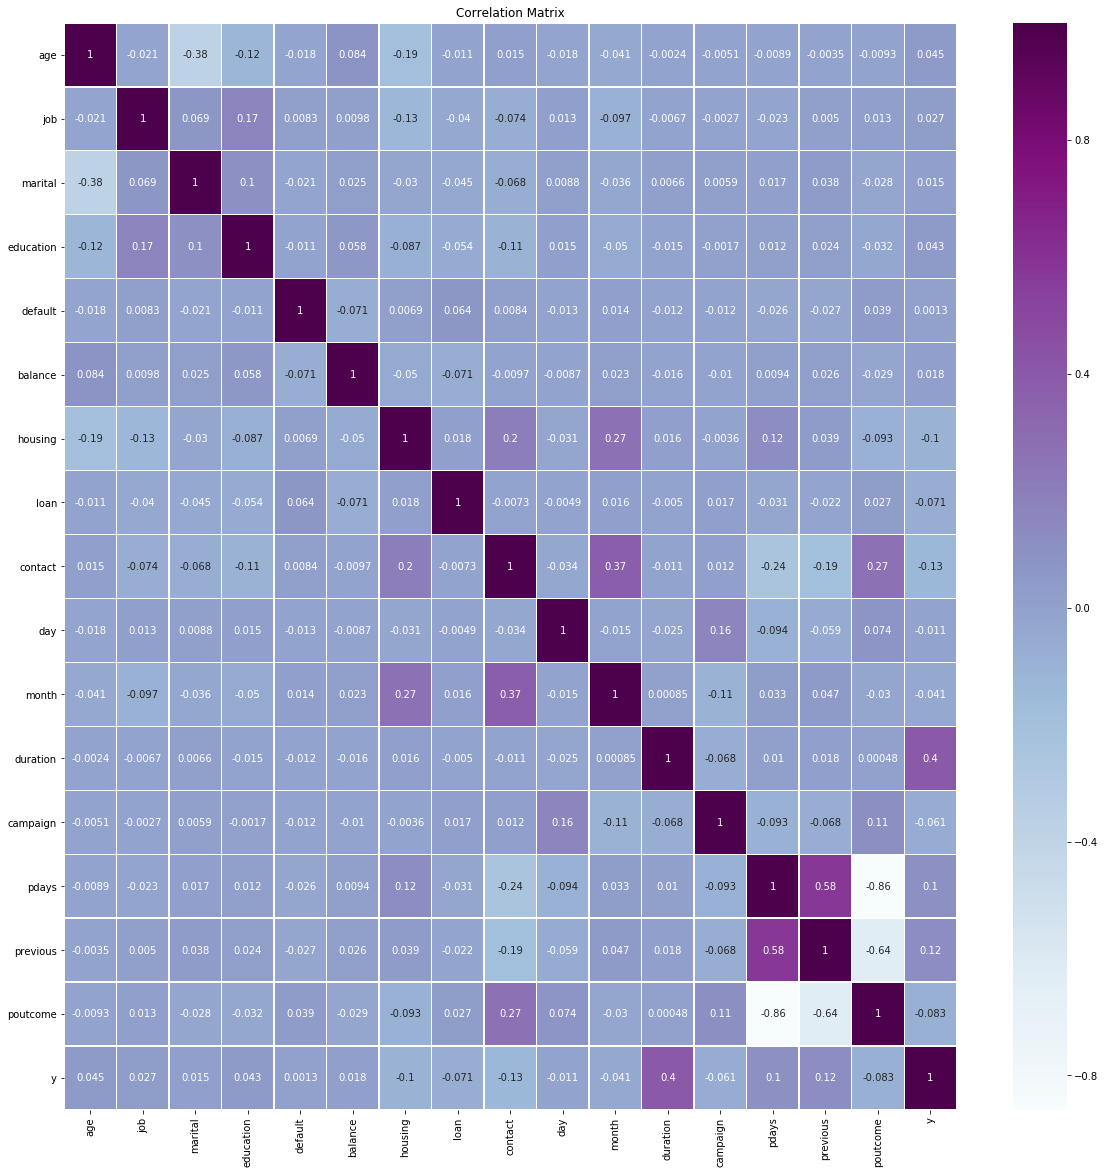

In [253]:
correlation_heatmap = sns.heatmap(df_corr_3,annot=True,cmap='BuPu',linewidths=0.4,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10,rotation=360)
plt.title('Correlation Matrix')
plt.show()

I initially tried fitting a model using all the variables affecting output 'y'. But, the accuracy of the algorithm was low.
Hence from the above correlation matrix, I am using only the variables 'housing', 'contact', 'duration', 'pdays', 'previous', 'y' which can affect the required output 'y'. 
The data for training the model is then extracted below and it is then used for all the further operations

In [90]:
df_bank_finaldata=df_bank[['housing','contact','duration','pdays','previous','y']]
df_bank_finaldata

,housing,contact,duration,pdays,previous,y
0,0,0,79,-1,0,0
1,1,0,220,339,4,0
2,1,0,185,330,1,0
3,1,2,199,-1,0,0
4,1,2,226,-1,0,0
5,0,0,141,176,3,0
6,1,0,341,330,2,0
7,1,0,151,-1,0,0
8,1,2,57,-1,0,0
9,1,0,313,147,2,0


### *Using K Nearest Neighbors Classifier and Prediction for bank.csv data set*

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X=df_bank_finaldata.drop('y',axis=1)
Y=df_bank_finaldata['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
# Training
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
neighpredict=neigh.predict(X_test)

### *Classification Report and Confusion Matrix*

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,neighpredict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1202
           1       0.51      0.41      0.45       155

   micro avg       0.89      0.89      0.89      1357
   macro avg       0.72      0.68      0.69      1357
weighted avg       0.88      0.89      0.88      1357



In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, neighpredict)
print(confusion_matrix)

[[1141   61]
 [  92   63]]


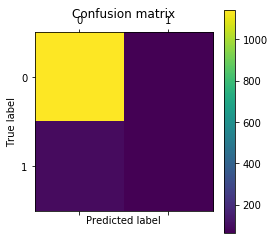

In [98]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
neighscore=neigh.score(X_test,y_test)
neighscore

0.8872512896094326

In [100]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(neighscore))

Accuracy of Decision Tree classifier on test set: 0.89


### -----------------------------------------------------------------------------------------------------
## Summary of Accuracy of all the classifiers for all data sets
### -----------------------------------------------------------------------------------------------------

In [102]:
d = {'Algorithm': ['Logistic Regression Classifier','Random Forest Classifier','Decision Tree Classifier','K-Nearest Neighbors Classifier'], 'Data Set': ['bank-additional-full.csv','bank-additional.csv','bank-full.csv','bank.csv'], 'Accuracy':[logmodelscore, RFscore, dtscore, neighscore]}
df = pd.DataFrame(data=d)
df

,Algorithm,Data Set,Accuracy
0,Logistic Regression Classifier,bank-additional-full.csv,0.908311
1,Random Forest Classifier,bank-additional.csv,0.901294
2,Decision Tree Classifier,bank-full.csv,0.887054
3,K-Nearest Neighbors Classifier,bank.csv,0.887251


#### ---------------------------------
### Thank You
#### ---------------------------------